## Variance Across Groups Exercises

There are many ways of doing feature reduction/extraction. 
We have seen how correlation between two variables can be used to exclude the features from a model. 
Highly correlated variables contribute less in explaining the variation in data because 
they vary in similar fashion; 
they more or less behave like same features. 
We have seen whether two features are independent or not using chi square test to see if the data in one 
feature is affecting how the data will be in other feature. 
We have seen how PCA tried to compress the data so that maximum variation in data is 
explained using minimal number of dimensions. We tried to explain the variation of data within a feature 
and between features by analyzing variance. Random forests helped us determine the importance of variables for fitting the model.

In this exercise, use the techniques of module 7 and the previous modules to predict the forest cover type from the provided data set. 

Some of the exercises are partially complete. 

You have to complete the code or modify the code in order to get the desired output. 
Some of the exercises may be challenging as they might not be directly discussed in the lab or practice notebooks. 
Sufficient guidance and hints are provided for you to look up for the functions or the description is 
provided on how to solve the problem. Use this guidance for answering the questions. 

### Data

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 
Each observation is a 30m x 30m patch. 
You are asked to predict an integer classification for the forest cover type. 
The seven types are:


#### Forest cover types

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

#### Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* lope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation




#### The wilderness areas are:

* Rawah Wilderness Area
* Neota Wilderness Area
* Comanche Peak Wilderness Area
* Cache la Poudre Wilderness Area

From [kaggle.com](https://www.kaggle.com/c/forest-cover-type-prediction/data)




Load the dataset from 'dsa/data/all_datasets/Forest/forest_cover.csv'

In [1]:
forest_cover = read.csv("/dsa/data/all_datasets/Forest/forest_cover.csv")

head(forest_cover)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5
2,2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5
3,3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2
4,4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2
5,5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5
6,6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2


In [2]:
str(forest_cover)

'data.frame':	15120 obs. of  56 variables:
 $ Id                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation                         : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect                            : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope                             : int  3 2 9 18 2 6 7 4 9 10 ...
 $ Horizontal_Distance_To_Hydrology  : int  258 212 268 242 153 300 270 234 240 247 ...
 $ Vertical_Distance_To_Hydrology    : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ Horizontal_Distance_To_Roadways   : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade_9am                     : int  221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade_Noon                    : int  232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade_3pm                     : int  148 151 135 122 150 140 138 144 133 124 ...
 $ Horizontal_Distance_To_Fire_Points: int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Wilderness_Area1    

The Cover_Type variables has 7 different classes of vegetation. 
Encode the coverType variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels 


* 1.SpruceFir
* 2.LodgepolePine
* 3.PonderosaPine
* 4.Cottonwood-Willow
* 5.Aspen
* 6.Douglas-fir
* 7.Krummholz

Also the columns Wilderness_Area1 through Wilderness_Area4 are mutually exclusive. 
They contain binary values, 1 if the row belongs to certain wilderness type or 0 otherwise. 
Like wise the variables soil_Type1 through soil_Type40 are mutually exclusive containing binary values. 
The column will have a 1 if soil_Type of certain type or 0 otherwise.  

**Activity 1:** Encode the Cover_Type variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels **using mapvalues() function in plyr package**.

In [3]:
table(forest_cover$Cover_Type)


   1    2    3    4    5    6    7 
2160 2160 2160 2160 2160 2160 2160 

In [4]:
# Your code for activity 1 goes here..

require(plyr) # Always load plyr package first if you have to use both plyr and dplyr. Because
              # dplyr package will mask some of the functions in plyr.
require(dplyr)  #Use require as it will give an error message if the package doesn't exist
require(lubridate)

forest_cover$Cover_Type <- mapvalues(forest_cover$Cover_Type, from = c(1,2,3,4,5,6,7), 
to = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"))

Loading required package: plyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




`mapvalues()` with map the values in from i'e 1,2,3... 
to corresponding values in to i'e 1.SpruceFir, 2.LodgepolePine,...

**Reference:**[mapvalues()](https://www.rdocumentation.org/packages/plyr/versions/1.8.4/topics/mapvalues)

In [5]:
# Run below commands for a quick brief info on the libraries on what they do.

# help(lubridate)
# help(plyr)
# help(dplyr)

**Activity 2:** Plot a bar graph for the observations of each Cover_Type. 
Use dplyr to first get the count of 7 cover types and normalize the count by dividing it by total rows in forest_cover dataset.

In [6]:
# # Code for activity 2 goes here...

library(ggplot2)

# # forest_cover data is supplied to group_by() function to group the data based on Cover_Type. 
# # This 7 groups of data formed above is supplied as input to summarize() where we are getting the 
# # count of observations stored in the variable count. cover_type_ratio is created to store the 
# # ratio of cover type. 

coverType_count = forest_cover %>%  
  group_by(Cover_Type) %>%    # data is grouped according to labels (1,2,3,4,5,6,7) of cover type
  dplyr::summarize(count = n()) %>%  # count the number of observations in each group
  mutate(cover_type_ratio=count/sum(count)) # divide the counts obtained in above step to get the ratio.

# # Display the contents of the variable coverType_count
coverType_count

Cover_Type,count,cover_type_ratio
<chr>,<int>,<dbl>
1.SpruceFir,2160,0.1428571
2.LodgepolePine,2160,0.1428571
3.PonderosaPine,2160,0.1428571
4.Cottonwood-Willow,2160,0.1428571
5.Aspen,2160,0.1428571
6.Douglas-fir,2160,0.1428571
7.Krummholz,2160,0.1428571


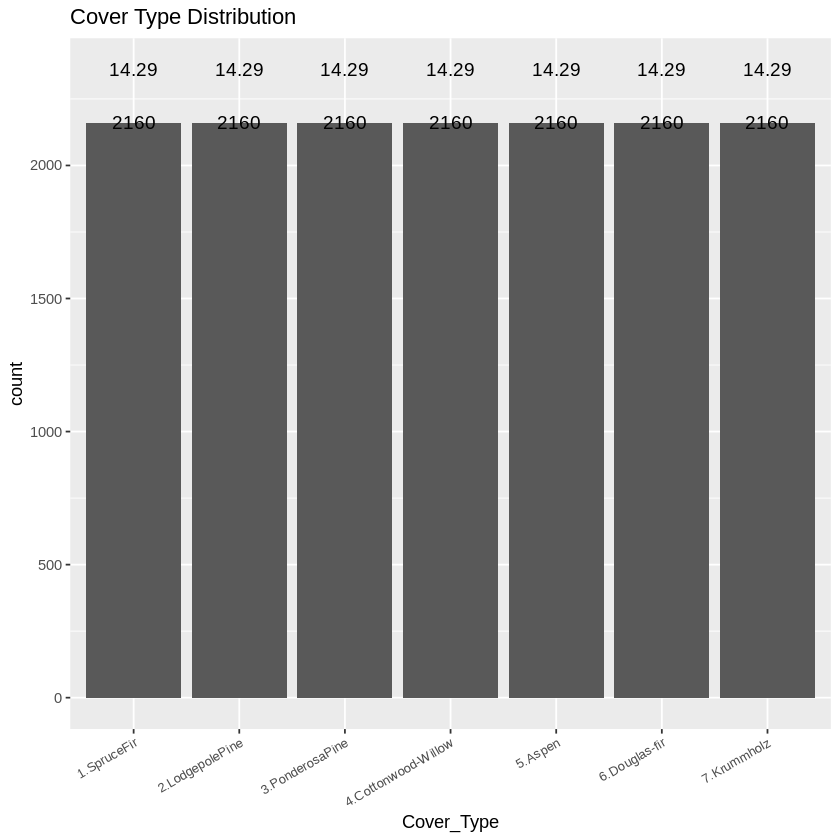

In [7]:
# Code for activity 2 continues here.

# plot the distribution of cover type using the dataframe "coverType_count" created above. 
plot<-ggplot(coverType_count, aes(x=Cover_Type, y=count)) +   
  geom_bar(stat="identity") + # plot a bar graph 
  scale_y_continuous() + 
  geom_text(data=coverType_count, aes(label=count,y=count),size=4) + # Display the count for each category 
                    # at y position "count(2160)+100". This will display the value right above the bars.
  geom_text(data=coverType_count, aes(label=round(cover_type_ratio*100,2),y=count+200),size=4)+
                    # Display the count percentage rounded to one decimal place at y position "count(2160)+200". This  
                    # will display the ratios right above the counts printed in previous steps.          

                    # You should convert the ratio 0.1428571 to 14.3% for printing in above step.

  theme(axis.text.x=element_text(angle=30,hjust=1,size=8))+ # code to adjust the indices on x-axis 
                                                            # tilted. Play with the code to see what each parameter is doing.
  ggtitle('Cover Type Distribution')

plot

The forest cover is equally distributed with 7 different types as evident from above plot. 

**Activity 3:** The names of some of the variables are too long. Modify the column names as listed.

In [8]:
oldnames<-c("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Hillshade_9am",
                  "Hillshade_Noon","Hillshade_3pm")

newnames<-c("Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm")

library(data.table)

# Your code for activity 3 goes here.

setnames(forest_cover,oldnames,newnames)




Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [9]:
# Sanity check
str(forest_cover)

'data.frame':	15120 obs. of  56 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation       : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect          : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope           : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HD.Hydro        : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VD.Hydro        : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HD.Road         : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ HS.9am          : int  221 220 234 238 220 230 222 222 223 228 ...
 $ HS.noon         : int  232 235 238 238 234 237 225 230 221 219 ...
 $ HS.3pm          : int  148 151 135 122 150 140 138 144 133 124 ...
 $ HD.Fire         : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Wilderness_Area1: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Wilderness_Area2: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wilderness_Area3: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Wilderness_Area4: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Soil_Type1      : 

**Activity 4:** Create box plots for each of the variables listed above in activity 3. 


`Follow the partial code below to complete it`: 

The code may look little dense but its because of the for loop we are running. 
The loop will capture each plot in an array. Ignore the for loop for some time and look at the code inside. It's a regular simple box plot. 

Use `aes_string(y=newnames[i],x="Cover_Type")` inside ggplot(). 
It means, x axis will be Cover_type and y-axis will be the variable in the list "newnames". 
The for loop will repeat 10 times for the 10 variables in the list to produce 10 box plots. 

First box plot would be between Elevation and Cover_Type

Second box plot would be between Aspect and Cover_Type and so on


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




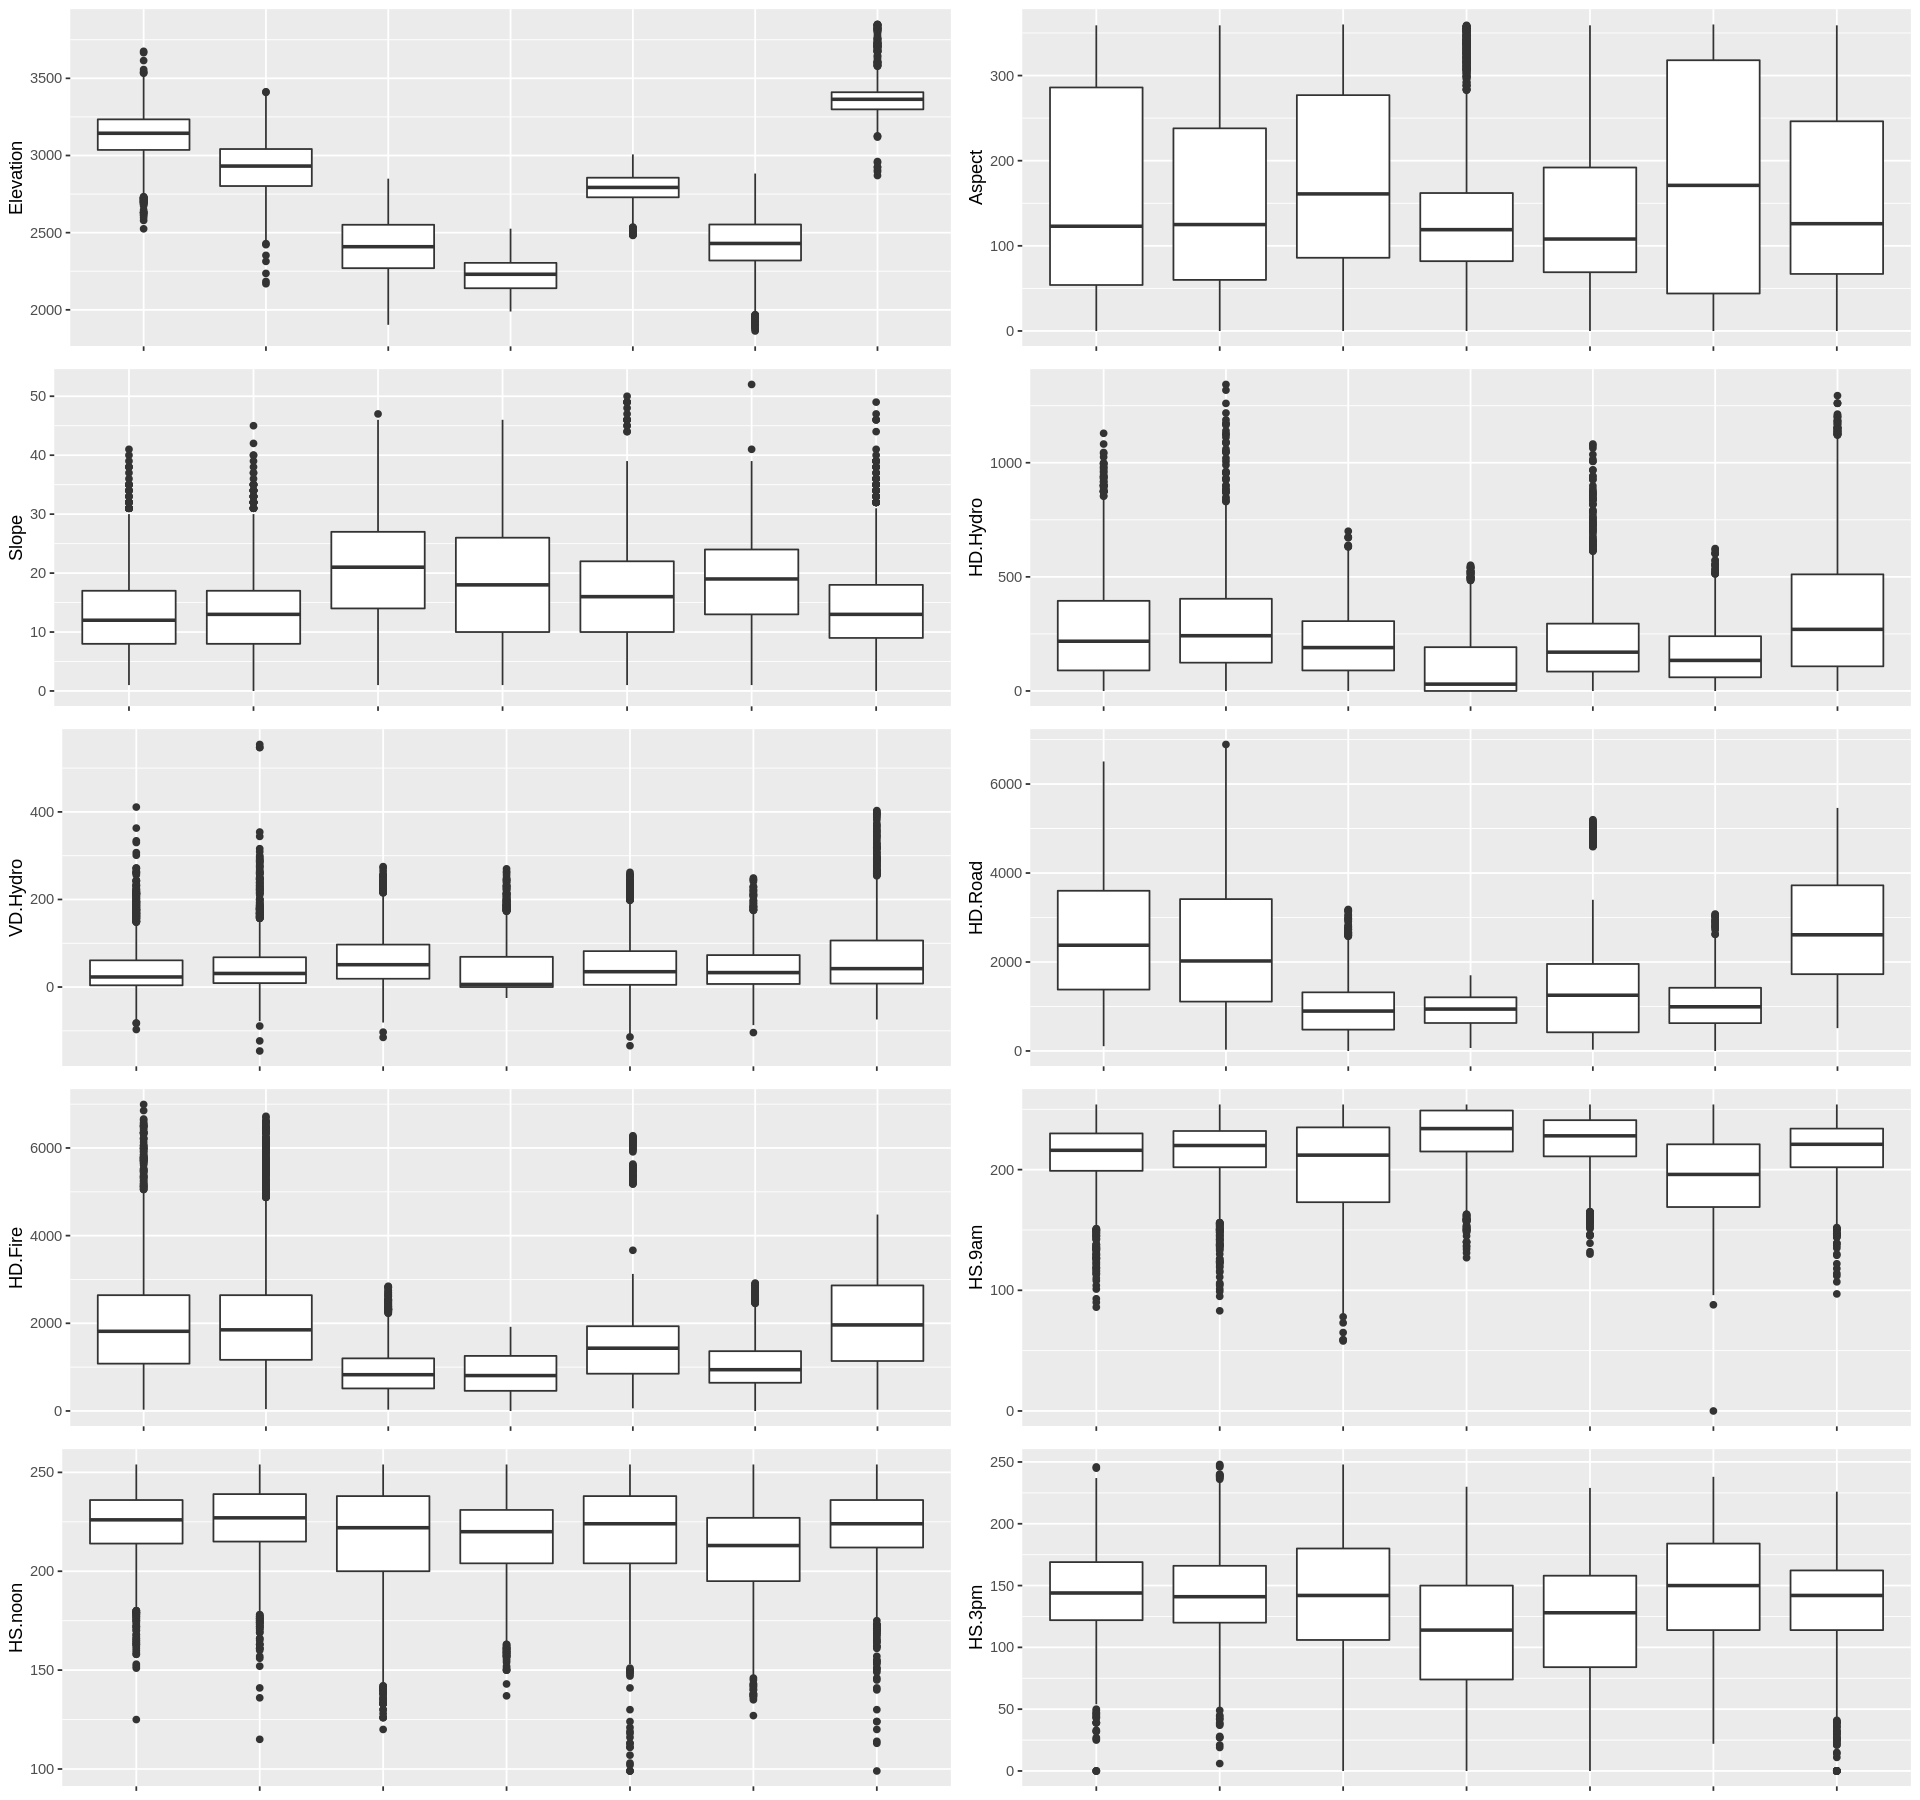

In [10]:
# Your code for activity 4 goes here....
options(repr.plot.width = 16, repr.plot.height = 15)

p=list()
for(i in 1:length(newnames)){
  p[[i]] <- ggplot(forest_cover, aes_string(y=newnames[i],x="Cover_Type")) + 
              geom_boxplot() + 
              theme(axis.text.x=element_blank(),axis.title.x=element_blank()) # This line will keep the
               # x-axis label and title of each plot empty.
  }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],p[[7]],p[[8]],p[[9]],p[[10]],
    ncol=2) # ncol will arrange two plots in each row.

**Activity 5:** 
Find correlation between the columns 2 to 10 in forest_cover. 
The first column is ID. So ignore it. The rest of the columns have binary values. 
Use `ggcorr()` function in GGally package. 

**Reference:**[ggcorr()](https://briatte.github.io/ggcorr/)

In [11]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [12]:
# Run the cell to learn more about the ggcorr() function parameters.
help(ggcorr)

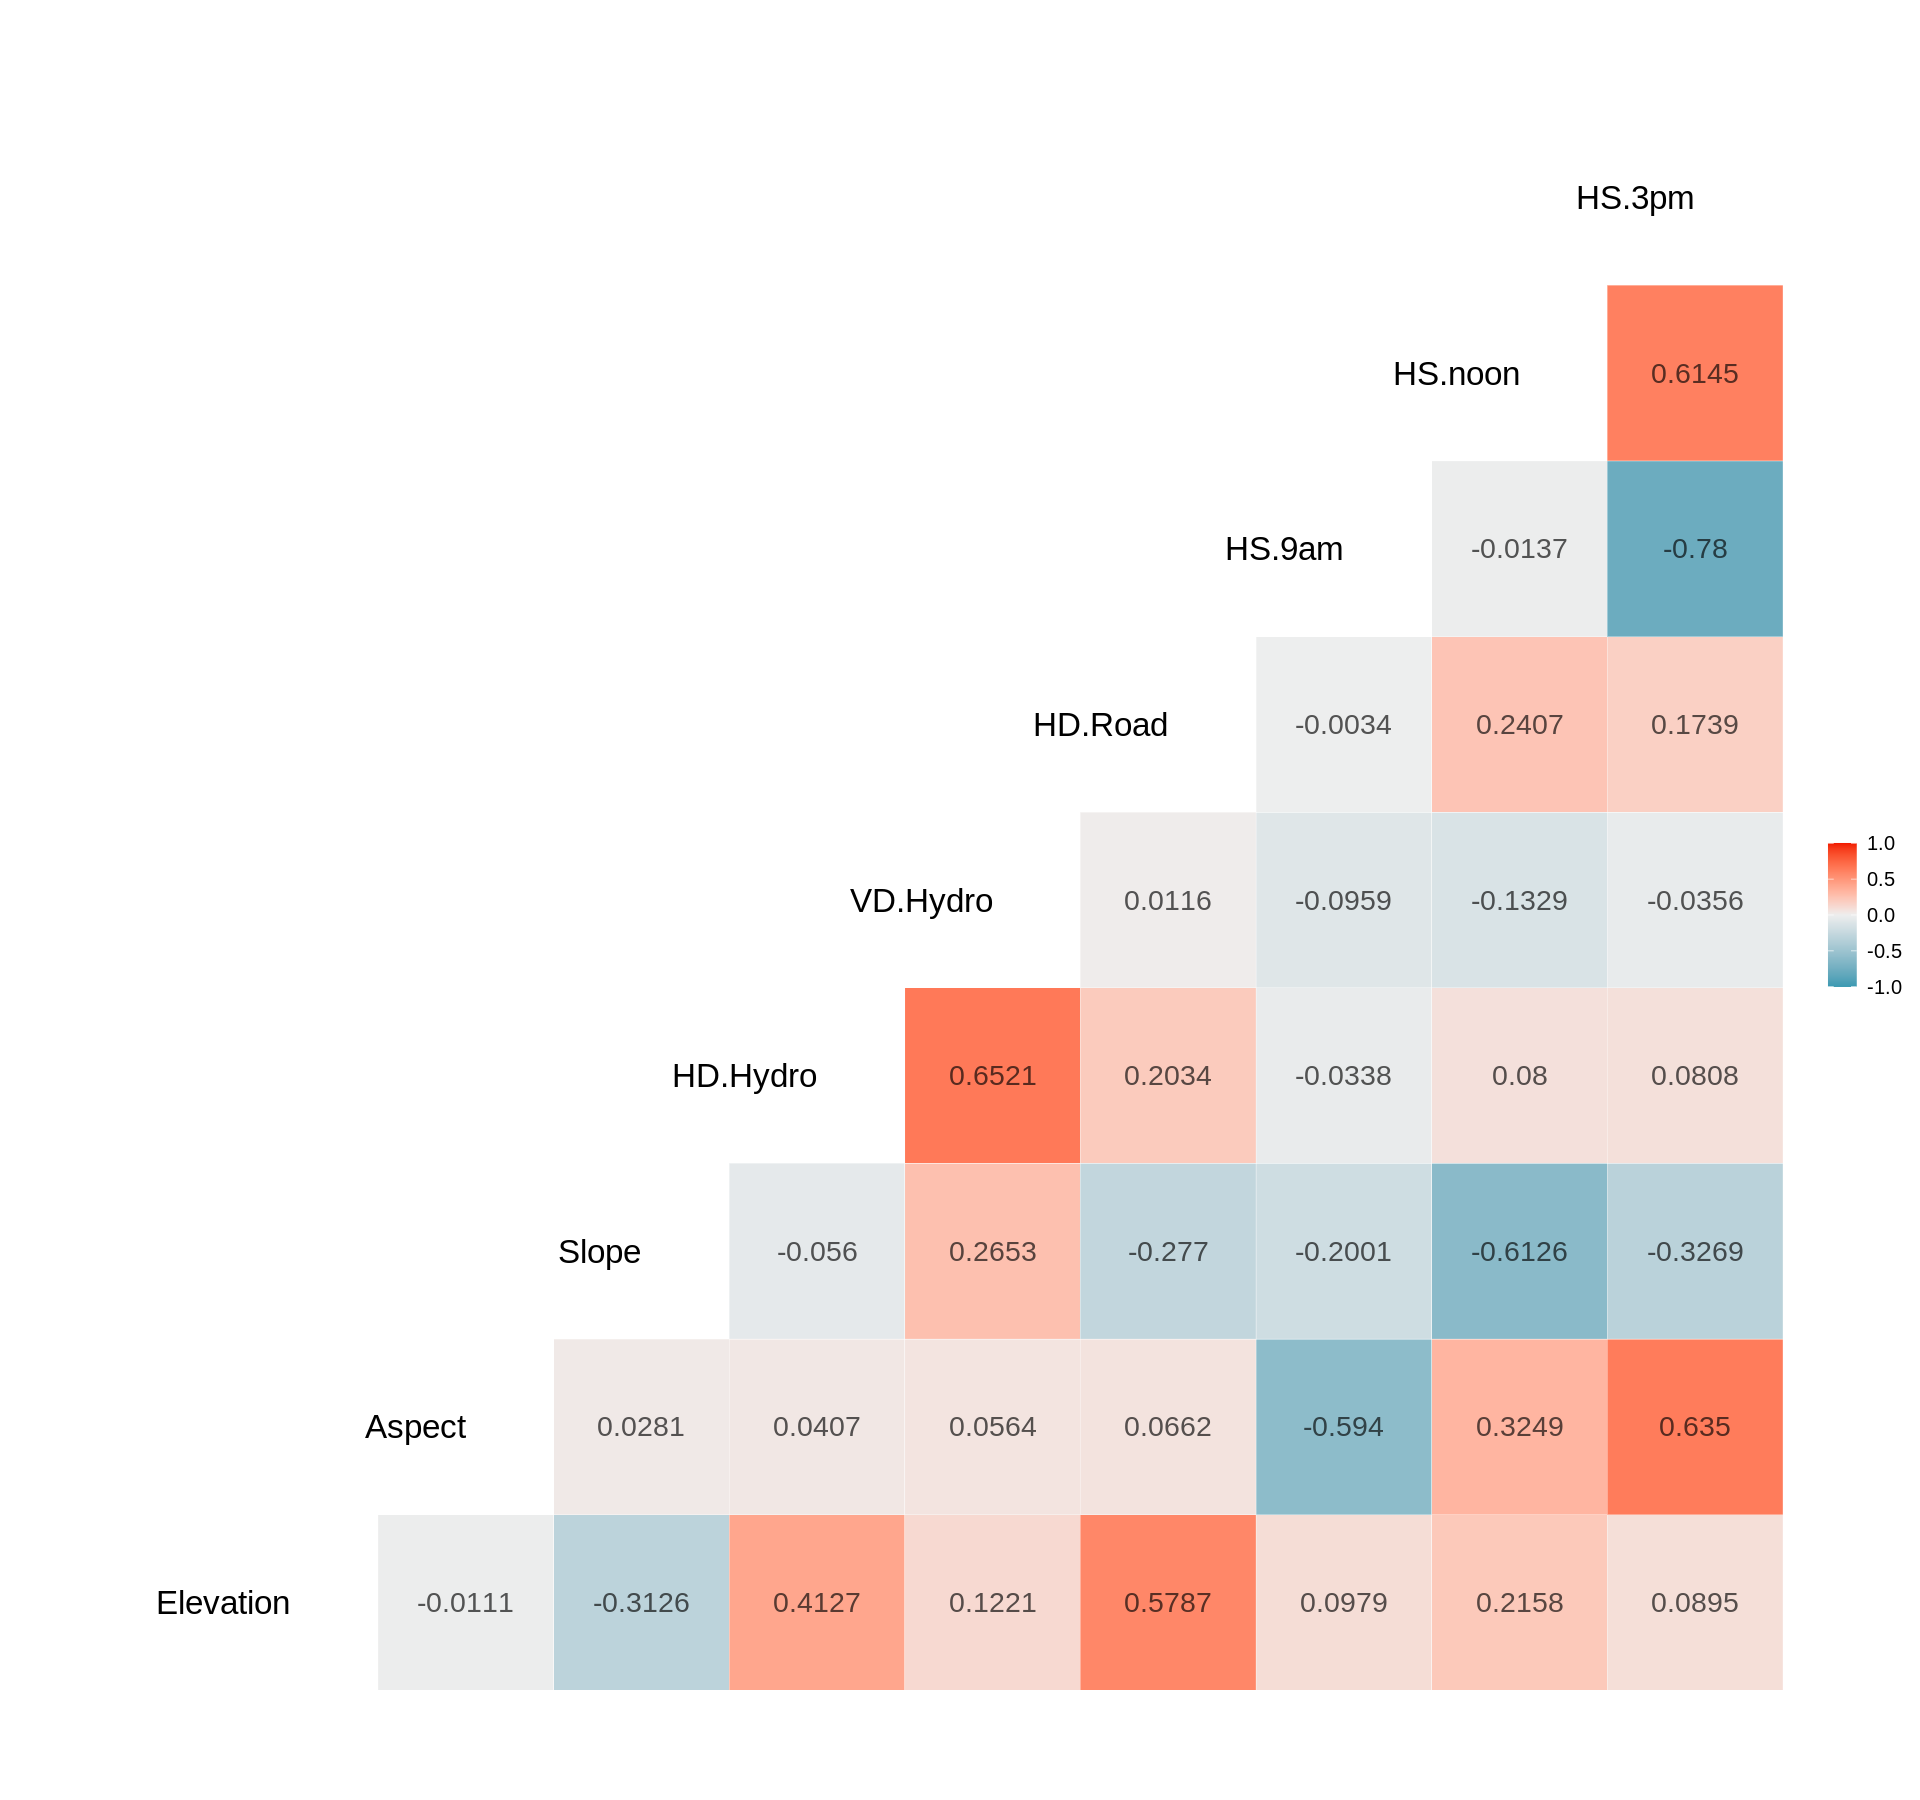

In [13]:
# Your code for activity 5 goes here....

corr_plot<-ggcorr(forest_cover[,2:10],label=TRUE,label_size=6,label_round=4,label_alpha=0.65,
                  hjust=1,size=7,layout.exp=1,legend.size=12) 
                           # Run help(ggcorr) for documentation
    
# label indicates to add correlation coefficients to the plot.

# label_size indicates size of the correlation coefficients

# label_round : indicates how many decimals the correlation coefficiens should be rounded

# label_alpha: indicates whether the correlation coefficients be made increasingly transparent as they 
# come close to 0. 

# hjust: will adjust the position of labels Elevation , Aspect etc horizontally from the plot. 
# Change the value to 0 and 4 to understand how it works.

# size: indicates size of the labels Elevation, Aspect etc. Change the number to 10 to see how it works.

# layout.exp: Its a multiplier to expand the horizontal axis to the left if variable names get clipped. 


# Plot the correlation plot created above.
corr_plot

--- 

**Activity 6:** Identify the pairs of variables which have a correlation of greater than 0.5 or less than -0.5 using above correlation plot and draw scatter plots for each pair of variables. 

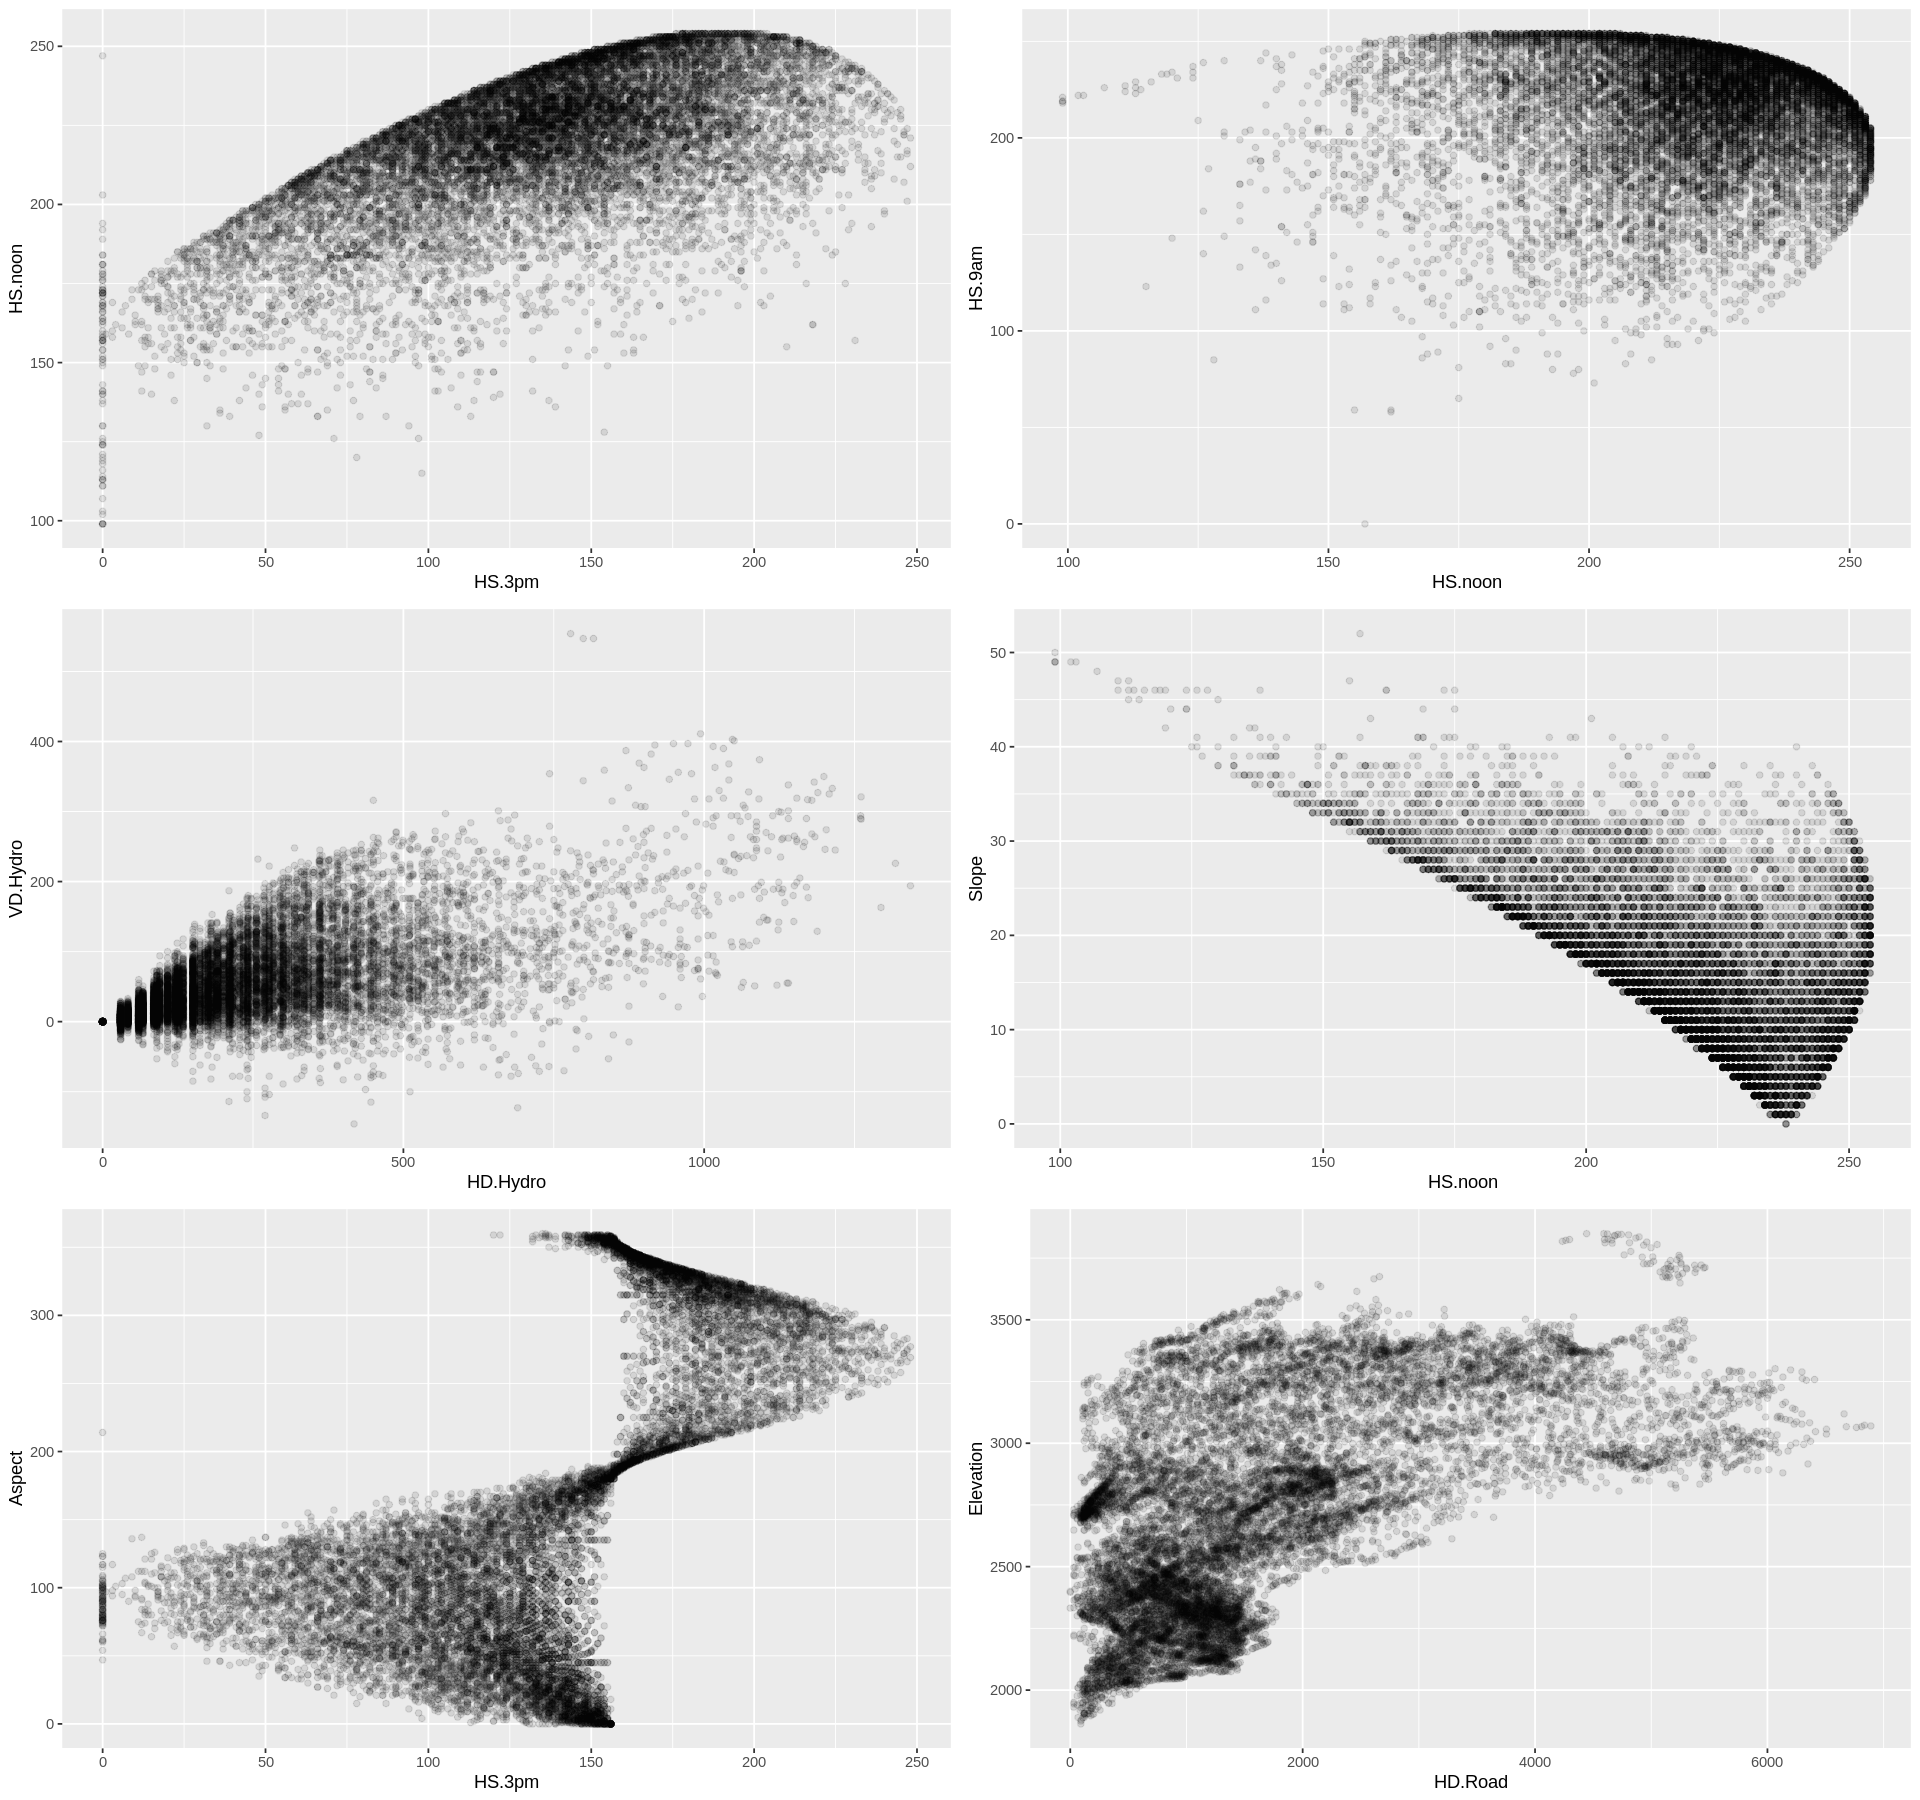

In [18]:
# Your code for activity 6 goes here....

#"Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm"
# For example, HS.noon is correlated with HS.3pm

# so you will include HS.noon in this list
# corrFeature1<-c("HS.noon","HS.3pm","HS.9am","HS.noon","VD.Hydro","HD.Hydro","Slope"
#                 ,"HS.noon","Aspect","HS.3pm","Elevation","HD.Road") 

# # corresponding feature HS.3pm is included in this list 
# # in the same position as one to one mapping.
# corrFeature2<-c("HS.3pm","HS.noon","HS.noon","HS.9am","HD.Hydro","VD.Hydro","HS.noon"
#                 ,"Slope","HS.3pm","Aspect","HD.Road","Elevation") 

corrFeature1<-c("HS.noon","HS.9am","VD.Hydro","Slope","Aspect","Elevation") 

# corresponding feature HS.3pm is included in this list 
# in the same position as one to one mapping.
corrFeature2<-c("HS.3pm","HS.noon","HD.Hydro","HS.noon","HS.3pm","HD.Road") 

# scatterTemp<-sample_n(forest_cover,10000)

p=list()
for(i in 1:length(corrFeature1)){
  p[[i]] <- ggplot(forest_cover, aes_string(y=corrFeature1[i],x=corrFeature2[i])) +
              geom_point(alpha=1/10)
  }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],
    ncol=2) # ncol=2 will arrange two plots in each row.


The columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 are mutually exclusive. That means we can fuse these columns into one column. 

Combine the 4 columns listed above into one single column called wildernessArea. Assign the labels Rawah, Neota, ComanchePeak, CachePoudre for each row of wildernessArea where the row belongs to one of the 4 categories.

In [19]:
# Recode the Labels for the "wildernessArea" to one column. 

# Existing column names. These 4 columns have to be fused into one column called wildernessArea
oldCols <- c("Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4")

# New labels that are to be assigned to each row in wildernessArea corresponding to the category 
# of wilderness_Area it belongs
newLabels <- c("Rawah","Neota","ComanchePeak","CachePoudre")

# forest_cover is a dataframe. Convert it into a data.table to assign values using := operator.
forest_cover=data.table(forest_cover)
is.data.table(forest_cover) # make sure forest_cover is a data.table. 

for(i in 1:length(newLabels)) { # Loop for 4 times. length(newLabels) is 4. 
   refColumn<-oldCols[i] # Take the name in vector oldCols according to the loop count. oldCols[1] 
                         # will give Wilderness_Area1.
   refValue<-newLabels[i]  # Take the name in vector newLabels according to the loop count. 
                         # newLabels[1] will give Rawah
    
   forest_cover<-forest_cover[get(refColumn)==1,wildernessArea:=refValue]
}
# get(refColumn) will return the column. For example get(refColumn) returned Wilderness_Area1.
    # Then for every value 1 in Wilderness_Area1, wildernessArea will be assigned the value Rawah.
    
    # Or if get(refColumn) returned Wilderness_Area2.
    # Then for every value 1 in Wilderness_Area2, wildernessArea will be assigned the value Neota. 
    # This will continue for remaining two columns. 
    # Finally one fused column wildernessArea with recoded values Rawah, Neota etc is formed.

[1] TRUE

In [20]:
# Run the cell to understand how assignment operator(:=) works.
help(":=")

Repeat the same thing for columns Soil_Type1, Soi_Type2 and so on until Soil_Type40. Even these columns are mutually exclusive. That means we can fuse these columns into one column without losing any data. 

Combine the into one single column called soilType. Assign the new labels for each row of soilType where the row belongs to one of the 40 categories.

In [21]:
#Recode the Lables for the "Soil_Type" to one column called soilType. 
newLabels<-c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2')

oldCols <- c("Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8",
"Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16",
"Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24",
"Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32",
"Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40")

# The following code is same as previous cell.
for(i in 1:length(newLabels)) {
   refColumn<-oldCols[i]
   refValue<-newLabels[i]
   forest_cover<-forest_cover[get(refColumn)==1,soilType:=refValue]
}


# Remove the binary columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 and 
# other 40 columns of soil type. These binary column span from 12 through 55 columns. 
# Assign the these columns to NULL to delete them.

forest_cover <- forest_cover[ , colnames(forest_cover[,12:55,with=FALSE]):=NULL]

# In following line of code, colnames(forest_cover[,12:55,with=FALSE]):=NULL all columns 12 through 55 are
# assigned to NULL to delete them.

# with = FALSE, means the columns 12:55 will be a character vector of column names or a numeric vector 
# of column positions to select, and the value returned is always a data.table. 

In [22]:
# Understand the difference between with=TRUE and with=FALSE by looking at the output of the cell. Run help(data.table) to know 
# more about with operator and data.table
temp <- forest_cover[ , colnames(forest_cover[,1:5,with=TRUE])]
dim(temp)

temp <- forest_cover[ , colnames(forest_cover[,1:5,with=FALSE])]
(temp)

NULL

[1] "Id"        "Elevation" "Aspect"    "Slope"     "HD.Hydro"

In [23]:
# Run the cell to learn more about how data.table is different from dataframe.
help(data.table)

In [24]:
# Run str() to verify Wilderness_Area columns and soil_Type columns are merged and all those binary columns are deleted.
str(forest_cover)

Classes ‘data.table’ and 'data.frame':	15120 obs. of  14 variables:
 $ Id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation     : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect        : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope         : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HD.Hydro      : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VD.Hydro      : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HD.Road       : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ HS.9am        : int  221 220 234 238 220 230 222 222 223 228 ...
 $ HS.noon       : int  232 235 238 238 234 237 225 230 221 219 ...
 $ HS.3pm        : int  148 151 135 122 150 140 138 144 133 124 ...
 $ HD.Fire       : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Cover_Type    : chr  "5.Aspen" "5.Aspen" "2.LodgepolePine" "2.LodgepolePine" ...
 $ wildernessArea: chr  "Rawah" "Rawah" "Rawah" "Rawah" ...
 $ soilType      : chr  "Como1" "Como1" "Legault" "Como2" ...
 - attr(*, "

The forest_cover is ready for fitting a model on it. The binary columns are removed and converted into 
factor types. 

In [25]:
# Use setcolorder() function to reorder the columns in a dataset.
colOrder<-c("Id","Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire"
            ,"HS.9am","HS.noon","HS.3pm","Cover_Type","wildernessArea","soilType")

# Rearrange the columns of forest_cover according to above order.
setcolorder(forest_cover, colOrder)

# Shorten the names of columns for readability.
setnames(forest_cover,colOrder)

# Remove the Id column from forest_cover.
forest_cover$Id=NULL

**Reference:**

* [setcolorder()](https://www.rdocumentation.org/packages/data.table/versions/1.9.6/topics/setcolorder) : orders the columns of data.table, by reference, to the new order provided.

* [setnames](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/setNames.html): This is a convenience function that sets the names on an object and returns the object.

Let's convert character types to factor types first. 

In [26]:
forest_cover$Cover_Class <- factor(forest_cover$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))

forest_cover$Cover_NumClass <- as.numeric(forest_cover$Cover_Class)

forest_cover$soilType <- factor(forest_cover$soilType,
levels = c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2'),
labels = c(1:40))


forest_cover$wildernessArea <- factor(forest_cover$wildernessArea,
levels = c("Rawah","Neota","ComanchePeak","CachePoudre"),
labels = c(1,2,3,4))

head(forest_cover)

Elevation,Aspect,Slope,HD.Hydro,VD.Hydro,HD.Road,HD.Fire,HS.9am,HS.noon,HS.3pm,Cover_Type,wildernessArea,soilType,Cover_Class,Cover_NumClass
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<fct>,<dbl>
2596,51,3,258,0,510,6279,221,232,148,5.Aspen,1,29,5,5
2590,56,2,212,-6,390,6225,220,235,151,5.Aspen,1,29,5,5
2804,139,9,268,65,3180,6121,234,238,135,2.LodgepolePine,1,12,2,2
2785,155,18,242,118,3090,6211,238,238,122,2.LodgepolePine,1,30,2,2
2595,45,2,153,-1,391,6172,220,234,150,5.Aspen,1,29,5,5
2579,132,6,300,-15,67,6031,230,237,140,2.LodgepolePine,1,29,2,2


---
**Activity 7:** Split the data into training and testing sets. Put 70% of data in "Forestcover_train" dataframe and rest in "Forestcover_test" dataframe. **Use the seed as 100** to reproduce test results for evaluation. 

Testing set will be used to evaluate the predictive capability of the model.

In [ ]:
# Your code for activity 7 goes here. 

# Be care ful in splitting the data. Set the seed as 100 for consistency in the results across everyone's notebooks. 
# use sample.split() function for splitting the data into 70% in training and rest in testing sets.
# Split the data on forest_cover$Cover_Type not on forest_cover.

library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(<what goes in here>)


Forestcover_train = <what goes in here>

Forestcover_test = <what goes in here>

---
**Activity 8:** Calculate feature importance of the **numerical** variables in **Forestcover_train**

 1. using Random Forest, then 
 2. print out the variable importance table, and 
 3. plot the variable importance plot. 

Use variables Elevation, Aspect, Slope, HD.Hydro, VD.Hydro, HD.Road, HD.Fire, HS.9am, HS.noon, HS.3pm only. 

In [ ]:
library(randomForest)


# Your code for activity 8.1 goes here...

RandomForest_fit <- randomForest(<what goes in here>,
                                 method=<what goes in here>,
                                 data=<what goes in here>, importance=TRUE) 

In [ ]:
plot(RandomForest_fit)
legend("topright", colnames(RandomForest_fit$err.rate),col=1:4,cex=0.8,fill=1:4)

In [ ]:
# Code for activity 8.2 continues here...

<what goes in here>(RandomForest_fit)

In [ ]:
# Code for activity 8.3 continues here...

<what goes in here>(RandomForest_fit)

#### Feature Importance

The feature importance of the 10 columns, with respect to Cover_Type variable is calculated above.
The table is presented with importance of each variable calculated from the random forest importance function.
Additionally, you have plotted the most important variables.

**Look at the importance with respect to MeanDecreaseGini: Elevation is the top feature.**

**Activity 9:**  Perform five ANOVAs between the variable
Cover_Type and each of the **first 5** important features according to **MeanDecreaseGini importance**. Cover_type will be the factor. 

In [ ]:
fit1 = <your code here>
summary(fit1)

fit2 = <your code here>
summary(fit2)

fit3 = <your code here>
summary(fit3)

fit4 = <your code here>
summary(fit4)

fit5 = <your code here>
summary(fit5)


**Activity 10:** Perform MANOVA between combined first 5 important features against Cover_Type.

In [ ]:
# Your code for activity 10 goes here.
fit6 = <your code here>
summary(fit6)


**Activity 11:** Fit a multinomial logistic regression model on Forestcover_train to predict Cover_Class using first five important variables. Name this model as Forestcover_1.

In [ ]:
# Your code for activity 11 goes here....
library(nnet)
Forestcover_1 <- <your code here>
summary(Forestcover_1)

#### Asses the model accuracy

**Activity 12:** Predict the Cover_Class both on **Forestcover_train** and **Forestcover_test** using the model Forestcover_1 built above. Build confusion matrices to asses the performance of the model on the training and test sets and find the accuracies of predictions. 

In [ ]:
# Your code for Activity 12 goes here.

pred_train <- <your code here>

pred_test <- <your code here>

ctable_tr <- <your code here>
ctable_tr 

ctable_ts <- <your code here>
ctable_ts 

print(paste("training accuracy = ",round((sum(diag(ctable_tr))/sum(ctable_tr))*100,2)))
print(paste("training accuracy = ",round((sum(diag(ctable_ts))/sum(ctable_ts))*100,2)))

**Activity 13:** Load framingham data and do a Two-way between ANOVA for education and and gender against `cigsPerDay`. Do education levels make a difference? 

In [ ]:
framingham_data=read.csv("/dsa/data/all_datasets/framingham/framingham.csv")
framingham_data$male=as.factor(framingham_data$male)
framingham_data$education=as.factor(framingham_data$education)
head(framingham_data)

In [ ]:
library(ggplot2)

ggplot(data=framingham_data) + geom_boxplot(aes(x=education, y=cigsPerDay, color=male))

In [ ]:
# Your code for Activity 13 goes here.

f.fit <- <your code here>
summary(f.fit)

TukeyHSD(f.fit)

# Save your notebook

## Use Git to : Add, Commit, and Push all your course work!